# DSCI 100 Group Project Proposal



## Loading Libraries:

In [21]:
library(tidyverse)
library(tidymodels)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Introduction:

Add intro here. 

### Preliminary exploratory data analysis: 

In [10]:
# Dataset read into R.

player_stats <- read_csv("player_stats.csv")
player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
#Fixed titles and changed the types
player_stats <- player_stats |>
    rename_all(~ gsub(" ", "_", .)) 

# Selecting the needed the columns (Age, Best_Rank, Prize_Money), 
# Filtering out rows which don't have any prize money won,
# Changing the column types to correct type
# Getting rid of the date of births and the best_rank dates from both columns. 
# Getting rid of everything besides the number in the Prize_Money column  

player_stats_tidy <- player_stats |> 
    select(Age, Current_Rank, Best_Rank, Prize_Money) |>
    filter(!is.na(Prize_Money)) |>
    mutate(Age = as.integer(sub("\\s*\\(.*\\)", "", Age))) |>
    mutate(Best_Rank = as.integer(sub("\\s*\\(.*\\)", "", Best_Rank))) |>
    mutate(Prize_Money = gsub("\\$", "", Prize_Money)) |>
    mutate(Prize_Money = gsub("US", "", Prize_Money)) |>
    mutate(Prize_Money = gsub("[^0-9]", "", Prize_Money)) |>
    mutate(Prize_Money = as.numeric(Prize_Money)) |>
    mutate(Current_Rank = gsub("\\(.*\\)", "", Current_Rank)) |>
    mutate(Current_Rank = as.integer(Current_Rank))

print("Player Stats Tidy Data Frame")
player_stats_tidy


[1] "Player Stats Tidy Data Frame"


Age,Current_Rank,Best_Rank,Prize_Money
<int>,<int>,<int>,<dbl>
18,326,316,59040
32,178,44,3261567
21,236,130,374093
⋮,⋮,⋮,⋮
20,382,380,57943
26,5,4,2213236815
22,451,408,61984


In [12]:
write_csv(player_stats_tidy, "player_stats_tidy.csv")

In [13]:
set.seed(2000) ### DO NOT CHANGE

# Data split into training and testing

player_stats_split <- initial_split(player_stats_tidy, prop = 0.75, strata = Prize_Money)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)

## Data Summarized in tables

[1] "Max Prize Money"


Prize_Money
<dbl>


[1] "Min Prize Money"


Prize_Money
<dbl>
2893


[1] "Average Total Prize Money Won for every Age Group"


Age,Prize_Money
<int>,<dbl>
17,14340.0
18,182125.6
19,307714.6
⋮,⋮
36,1006655497
37,13376235
38,1002899210


[1] "Scatter Plot: Average Total Prize Money Won for every Age Group"


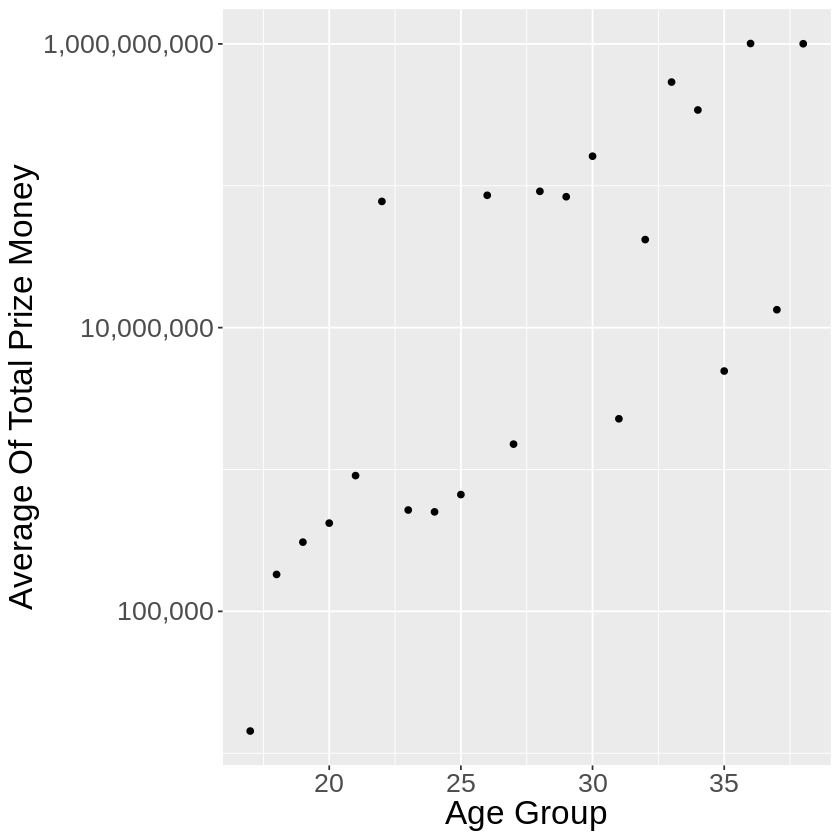

In [16]:
#Using only training data, summarize the data in at least one table.

# Minimum and Maximum amount of total prize money won 

### YES OR NO??

max_prize_money <- player_stats_training |>
    select(Prize_Money) |>
    arrange(Prize_Money) |>
    slice(375)

print("Max Prize Money")
max_prize_money

min_prize_money <- player_stats_training |>
    select(Prize_Money) |>
    arrange(Prize_Money) |>
    slice(1)

print("Min Prize Money")
min_prize_money

### GOOD COPY BELOW (IDEAS ABOVE)!

# Average Total Prize Money Won for every Age group.
print("Average Total Prize Money Won for every Age Group")
average_age_prize_money <- player_stats_training |> 
    group_by(Age) |> 
    summarize(Prize_Money = mean(Prize_Money))

average_age_prize_money

# Scatter plot showing the Average Total Prize Money won for every Age group. 
print("Scatter Plot: Average Total Prize Money Won for every Age Group")
average_age_prize_money_plot <- average_age_prize_money |>
    ggplot(aes(x = Age, y = Prize_Money)) + 
    geom_point() +
    xlab("Age Group") + 
    ylab("Average Of Total Prize Money") +
    scale_y_log10(labels = label_comma()) + 
    theme(text = element_text(size=20))

average_age_prize_money_plot


## Visualizations

We ploted each predictor and the variable we are trying to predict. 

Predictors: Age, Best Rank, Current Rank

Target Variable : Prize Money

Plots:
1. Prize Money vs. Age
2. Prize Money vs. Best Rank
3. Prize Money vs. Current Rank


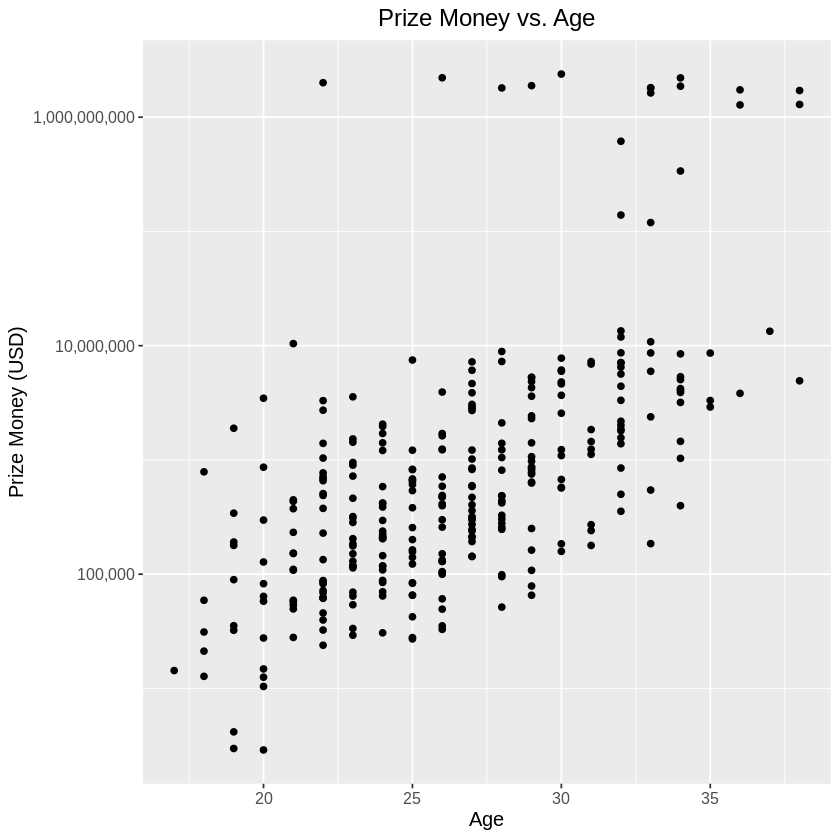

Warning message:
“Removed 1 rows containing missing values (geom_point).”


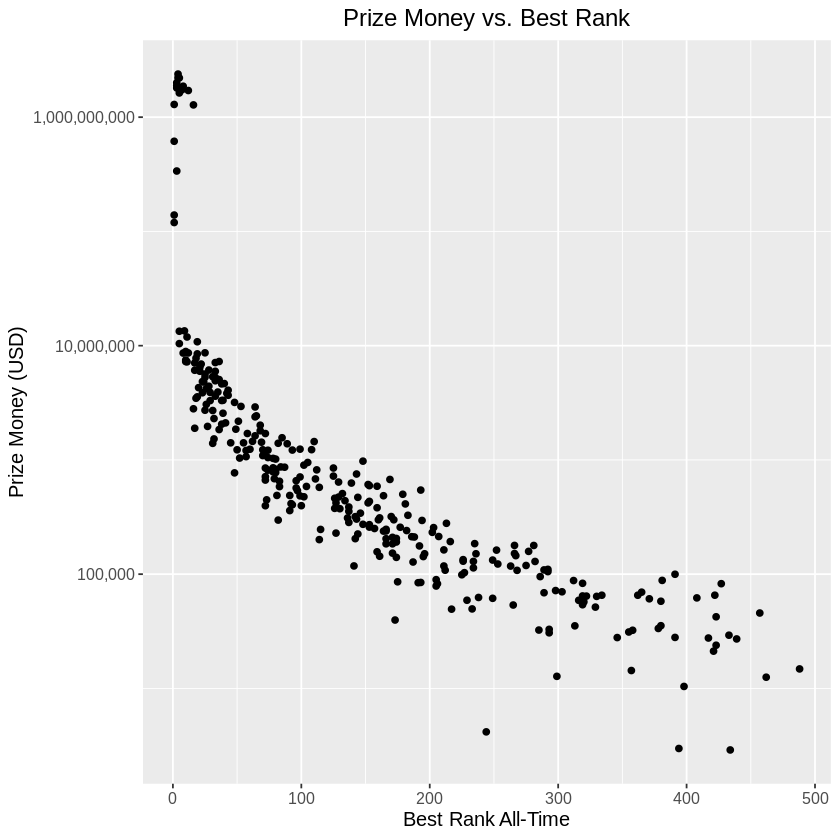

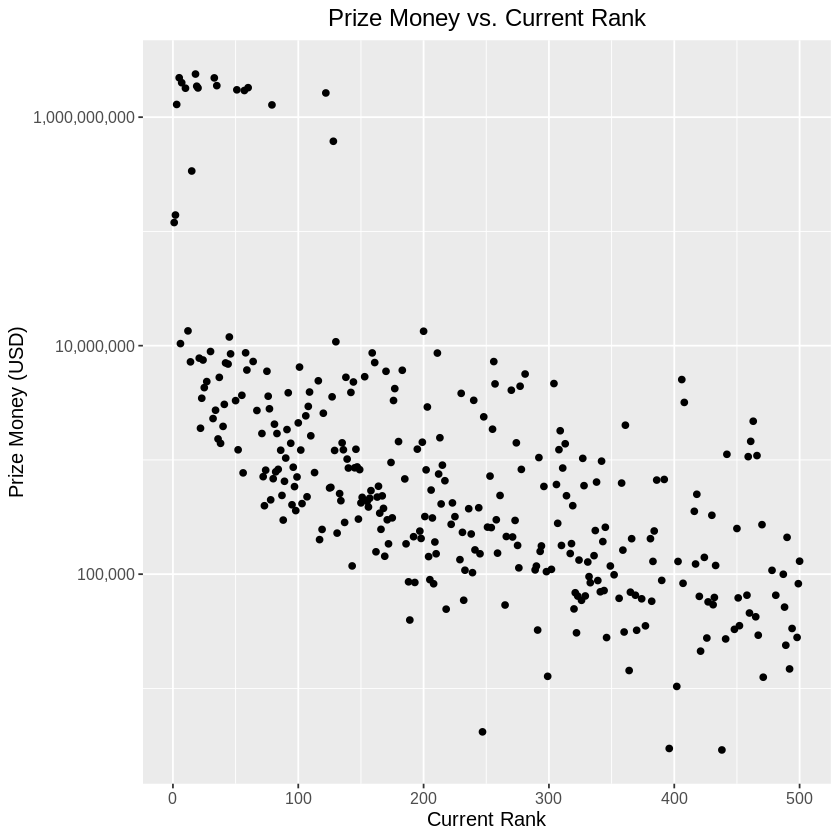

In [17]:
player_stats_plot_age <- player_stats_training |> 
    ggplot(aes(x = Age, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Age", y = "Prize Money (USD)", title = "Prize Money vs. Age") +
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

player_stats_plot_age


player_stats_plot_best_rank <- player_stats_training |> 
    ggplot(aes(x = Best_Rank, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Best Rank All-Time", y = "Prize Money (USD)", title = "Prize Money vs. Best Rank") +
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

player_stats_plot_best_rank

player_stats_plot_current_rank <- player_stats_training |> 
    ggplot(aes(x = Current_Rank, y = Prize_Money)) + 
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(x = "Current Rank", y = "Prize Money (USD)", title = "Prize Money vs. Current Rank") +
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

player_stats_plot_current_rank